In [36]:
import numpy as np
from scipy.misc import imread, imsave, imresize
import skimage
from skimage import data
from skimage.feature import corner_harris
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from skimage import data,exposure, img_as_float
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline
from scipy.fftpack import fft, fftshift
from math import sin,cos,pi
import math

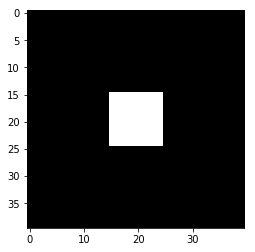

In [37]:
def generate_square():
    sq = np.zeros((40,40))
    sq[15:25,15:25] = 1
    return sq


plt.subplot(111)
plt.imshow(generate_square(), cmap='gray')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10


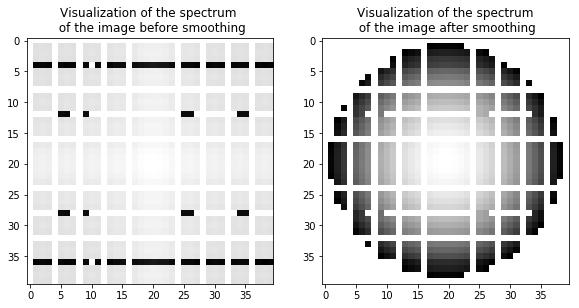

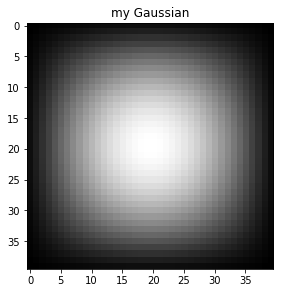

In [50]:
#         imgg =skimage.filters.gaussian(img, sigma= 0.5)


def frecuency_smoothing(img,sigma):
    
    
    
    def generate_mask(shape,sigma):
        # impliment the gaussian kernel
        scale = 100
        sigma=    (scale)/(sigma+1)
        
        rows, cols = shape
        x = np.linspace(-1,1, cols) * cols
        y = np.linspace(-1,1, rows) * rows
        r = np.sqrt((x**2)[np.newaxis,:] + (y**2)[:,np.newaxis])
        
        mask =np.exp((-(r)**2)/(2*(sigma**2))) # version 1
#         mask =255*np.exp((-(r))/(2*(sigma**2)))  # version 2
        return mask




    
# Visualization of the spectrum of the image before smoothing
    img=np.asarray(img)
    fft_img=np.fft.fft2(img)
    fft_img = np.fft.fftshift(fft_img)
    plt.figure(figsize=(15,15))
    plt.subplot(131)
    plt.imshow(20*np.log10(abs(fft_img)),cmap="gray")
#     plt.imshow(abs(fft_img),cmap="gray")

    plt.title('Visualization of the spectrum \n of the image before smoothing')

    
    shape=img.shape
    mask=generate_mask(shape,sigma)
    
    
    smoothed_image = mask * fft_img
    
#     Visualization of the spectrum of the image after smoothing
#     smoothed_image_fft=np.asarray(img)
#     smoothed_image_fft=np.fft.fft2(smoothed_image_fft)
#     smoothed_image_fft = np.fft.fftshift(smoothed_image_fft)
    plt.subplot(132)
    
    plt.imshow(20*np.log10(abs(smoothed_image)),cmap="gray")
#     plt.imshow(abs(smoothed_image),cmap="gray")

    plt.title('Visualization of the spectrum\n of the image after smoothing')
    
#     plt.subplot(133)
#     plt.imshow(20*np.log10(abs(smoothed_image_fft))-20*np.log10(abs(fft_img)))
#     plt.title('Visualization of the diff of spectrum\n of the image before after smoothing')
    
    plt.show()


    out = np.fft.ifft2(np.fft.ifftshift(smoothed_image))
    smoothed_image=out
    
    return smoothed_image

######################### main ###################################

img= generate_square()
# img = io.imread('cammeraman.png')
img= skimage.color.rgb2gray(img)
Image=img_as_float(img)



# s=0.01
s=99
sigma=70

                                                     
# our customized gaussian 
frecuency_smoothed=frecuency_smoothing(Image,sigma)




# built in gaussian 
# imgg =skimage.filters.gaussian(Image, sigma=s)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(np.abs(frecuency_smoothed), cmap='gray')

plt.title('my Gaussian')

# plt.subplot(132)
# plt.imshow(imgg, cmap='gray')
# plt.title('Gaussian')

# plt.subplot(133)
# plt.imshow(imgg-np.abs(frecuency_smoothed), cmap='gray')
# plt.title('diff myGaussian and Gaussian')

plt.show() 


